<a href="https://colab.research.google.com/github/David-S-Botero/BinaryClassificationWithNumpy/blob/main/Neural_Network_with_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

In [22]:
N = 1000
gaussian_quantiles = make_gaussian_quantiles(mean=None,
                        cov = 0.1,
                        n_samples= N,
                        n_features = 2,
                        n_classes=2,
                        shuffle=True,
                        random_state=None)
gaussian_quantiles

(array([[ 0.06878539,  0.30875863],
        [ 0.04927929,  0.0117601 ],
        [ 0.10241335, -0.03446366],
        ...,
        [-0.14127977, -0.36037083],
        [ 0.75410884, -0.4886319 ],
        [-0.12429024, -0.58147312]]),
 array([0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
        0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
        0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
        0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
        0, 1, 1, 1, 1, 0, 0, 

In [23]:
gaussian_quantiles[0].shape

(1000, 2)

In [24]:
gaussian_quantiles[1].shape

(1000,)

In [25]:
X, Y = gaussian_quantiles

In [26]:
X

array([[ 0.06878539,  0.30875863],
       [ 0.04927929,  0.0117601 ],
       [ 0.10241335, -0.03446366],
       ...,
       [-0.14127977, -0.36037083],
       [ 0.75410884, -0.4886319 ],
       [-0.12429024, -0.58147312]])

In [27]:
Y = Y[:,np.newaxis]

Text(0, 0.5, 'feature 2')

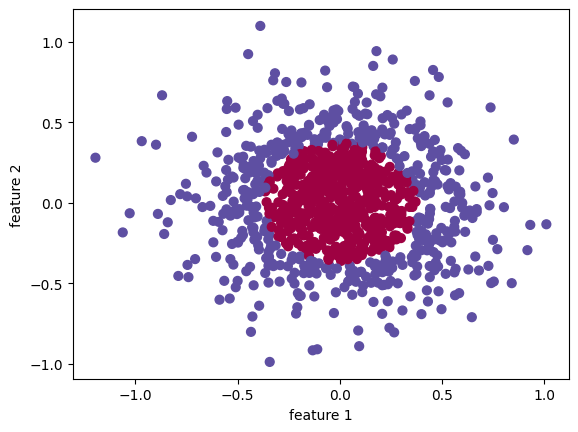

In [29]:
plt.scatter(X[:,0], X[:,1], c=Y[:,0],s=40,cmap=plt.cm.Spectral)
plt.xlabel('feature 1')
plt.ylabel('feature 2')


In [30]:
#Activation Functions
def sigmoid(x, derivative = False):
  if derivative:
    return np.exp(-x)/((np.exp(-x)+1)**2)
  else:
    return 1/(1+np.exp(-x))

def relu(x, derivative=False):
  if derivative:
    x[x<=0] = 0
    x[x>0] = 1
    return x
  else:
    return np.maximum(0,x)


In [31]:
#Loss function
def mse(y,y_hat,derivative=False):
  if derivative:
    return y-y_hat
  else:
    return np.mean((y-y_hat)**2)


In [32]:
def initialize_param_deep(layers_dim):
  parameters = {}
  L = len(layers_dim)
  for l in range(0,L-1):
    parameters['W'+str(l+1)] = (np.random.rand(layers_dim[l],layers_dim[l+1]) * 2) -1
    parameters['b'+str(l+1)] = (np.random.rand(1,layers_dim[l+1]) * 2) -1
  return parameters

In [35]:
layers_dims = [2,4,8,1]
params = initialize_param_deep(layers_dim=layers_dims)
params

{'W1': array([[-0.77658741, -0.49220318, -0.69049659, -0.34786149],
        [-0.91325076, -0.08008746,  0.14199514, -0.14793094]]),
 'b1': array([[ 0.09711685, -0.20600541, -0.28524406,  0.79678906]]),
 'W2': array([[ 0.22643635, -0.45912446, -0.05272527, -0.94506736, -0.94752503,
         -0.06278758, -0.32993061,  0.54346446],
        [-0.22222369, -0.01866961,  0.41765002,  0.27496467,  0.93782469,
          0.31928569, -0.99093522, -0.73817802],
        [ 0.36453287, -0.5663534 ,  0.3774963 , -0.09563379, -0.10338492,
         -0.85290994, -0.44856755, -0.03362005],
        [-0.89152949,  0.44058096, -0.71692452,  0.21283647,  0.14602758,
          0.13593109, -0.24732207, -0.04395961]]),
 'b2': array([[ 0.25150942, -0.09957608, -0.75304894, -0.39756999, -0.83511898,
          0.88731503,  0.14883404, -0.56390409]]),
 'W3': array([[-0.40220886],
        [-0.09833426],
        [-0.84117997],
        [ 0.13978256],
        [ 0.14250889],
        [ 0.99282772],
        [ 0.58918706],


In [39]:
X@params['W1']

array([[-0.33539193, -0.05858408, -0.00365385, -0.06960274],
       [-0.0490096 , -0.02519726, -0.03235731, -0.01888205],
       [-0.04805895, -0.04764807, -0.07560974, -0.03052742],
       ...,
       [ 0.43882503,  0.09839954,  0.04638229,  0.10245579],
       [-0.13938797, -0.33204148, -0.59009294, -0.19004165],
       [ 0.627553  ,  0.10774475,  0.00325563,  0.12925365]])

In [54]:
def train(x, learn_rate, params, train = True):
  #Forward
  params['A0'] = x
  params['Z1'] = params['A0']@params['W1'] + params['b1']
  params['A1'] = relu(params['Z1'])

  params['Z2'] = params['A1']@params['W2'] + params['b2']
  params['A2'] = relu(params['Z2'])

  params['Z3'] = params['A2']@params['W3'] + params['b3']
  params['A3'] = sigmoid(params['Z3'])

  output = params['A3']

  if train:
    #Backpropagation
    params['dZ3'] = mse(Y,output,True)*sigmoid(params['A3'],True)
    params['dW3'] = params['A2'].T@params['dZ3']

    params['dZ2'] = params['dZ3']@params['W3'].T * relu(params['A2'],True)
    params['dW2'] = params['A1'].T@params['dZ2']

    params['dZ1'] = params['dZ2']@params['W2'].T * relu(params['A1'],True)
    params['dW1'] = params['A0'].T@params['dZ1']

    #Gradient Descent 
    params['W3'] = params['W3'] - params['dW3'] * learn_rate
    params['b3'] = params['b3'] - np.mean(params['dW3'],axis=0, keepdims=True)

    params['W2'] = params['W2'] - params['dW2'] * learn_rate
    params['b2'] = params['b2'] - np.mean(params['dW2'],axis=0, keepdims=True)

    params['W1'] = params['W1'] - params['dW1'] * learn_rate
    params['b1'] = params['b1'] - np.mean(params['dW1'],axis=0, keepdims=True)

  return output